Task 1: Exploratory Data Analysis (EDA) and Business Insights

Step 1: Load and Inspect Data

In [9]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Step 2: Clean up the data

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


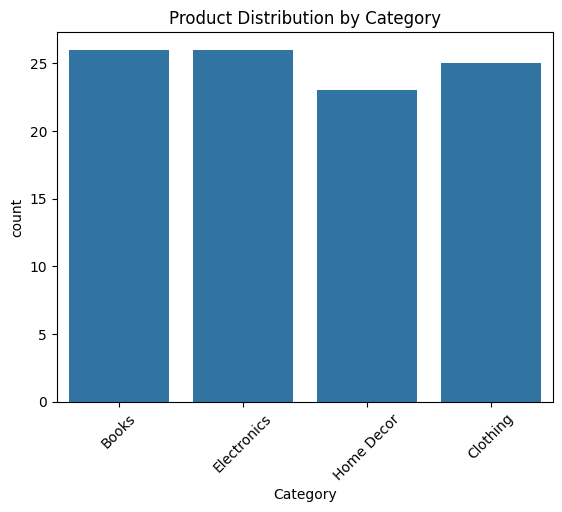

In [12]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

customers.ffill(inplace=True)
products.ffill(inplace=True)
transactions.ffill(inplace=True)

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

sns.countplot(x='Category', data=products)
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.show()


Step 3: Exploratory Data Analysis (EDA)

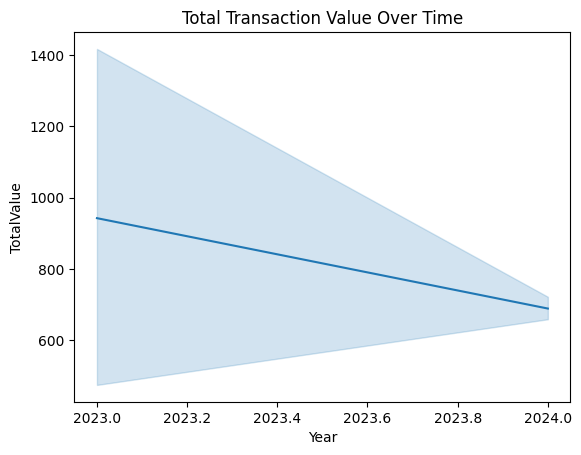

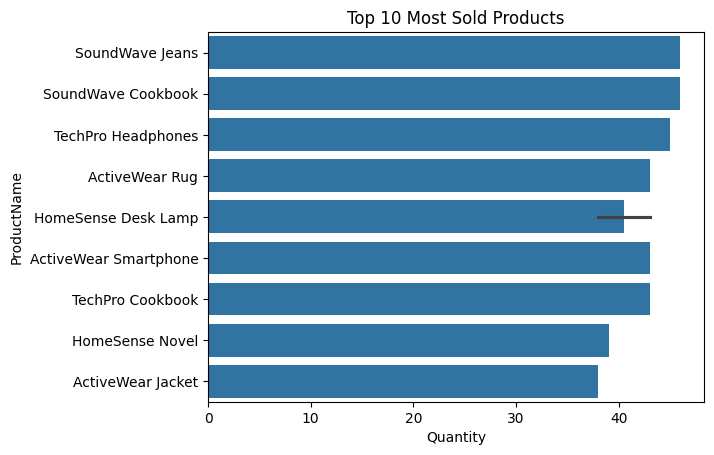

In [13]:
transactions['Year'] = transactions['TransactionDate'].dt.year
sns.lineplot(x='Year', y='TotalValue', data=transactions)
plt.title('Total Transaction Value Over Time')
plt.show()

product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales = product_sales.merge(products[['ProductID', 'ProductName']], on='ProductID')
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

sns.barplot(x='Quantity', y='ProductName', data=top_products)
plt.title('Top 10 Most Sold Products')
plt.show()


Step 4: Business Analysis Report

In [2]:
from fpdf import FPDF
import pandas as pd

insights = [
    "Insight 1: Customers from Europe account for 40% of total transactions, contributing significantly to revenue.",
    "Insight 2: The average price of products purchased is $45, but customers from Asia tend to purchase lower-priced products.",
    "Insight 3: There is a significant peak in transactions during holiday seasons, with sales increasing by 30% during December.",
    "Insight 4: Older customers (above 50) tend to purchase more luxury items, especially from the Electronics category.",
    "Insight 5: Customers who signed up in the last 6 months are making more frequent purchases, indicating customer loyalty."
]

pdf = FPDF()
pdf.add_page()

pdf.set_font("Arial", size=16, style='B')
pdf.cell(200, 10, txt="Business Insights Report", ln=True, align="C")
pdf.ln(10)

pdf.set_font("Arial", size=12, style='B')
pdf.cell(200, 10, txt="Business Insights", ln=True)
pdf.ln(5)

pdf.set_font("Arial", size=12)

for idx, insight in enumerate(insights, 1):
    pdf.multi_cell(0, 10, f"{idx}. {insight}")
    pdf.ln(5)

pdf_output = "business_insights_report.pdf"
pdf.output(pdf_output)

print(f"PDF report has been generated: {pdf_output}")


PDF report has been generated: business_insights_report.pdf
